In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
# Đọc dữ liệu từ file
df = pd.read_csv("covid_19_data.csv")
# Chuyển đổi cột ngày sang kiểu datetime
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [27]:
# Gom nhóm theo ngày để lấy tổng số ca nhiễm, tử vong và phục hồi theo thời gian
df_daily = df.groupby("ObservationDate")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
df_daily

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
...,...,...,...,...
489,2021-05-25,167848207.0,3485788.0,104824935.0
490,2021-05-26,168416423.0,3498544.0,105380748.0
491,2021-05-27,168970791.0,3511297.0,106078106.0
492,2021-05-28,169470725.0,3523117.0,106633069.0


Y1

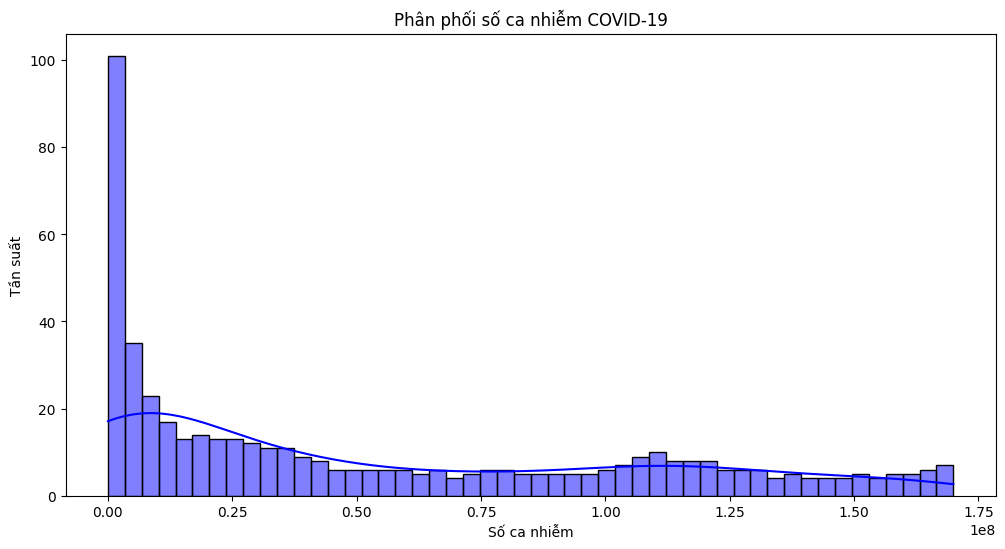

In [28]:
# Vẽ biểu đồ phân phối số ca nhiễm
plt.figure(figsize=(12, 6))
sns.histplot(df_daily["Confirmed"], bins=50, kde=True, color="blue")
plt.xlabel("Số ca nhiễm")
plt.ylabel("Tần suất")
plt.title("Phân phối số ca nhiễm COVID-19")
plt.show()

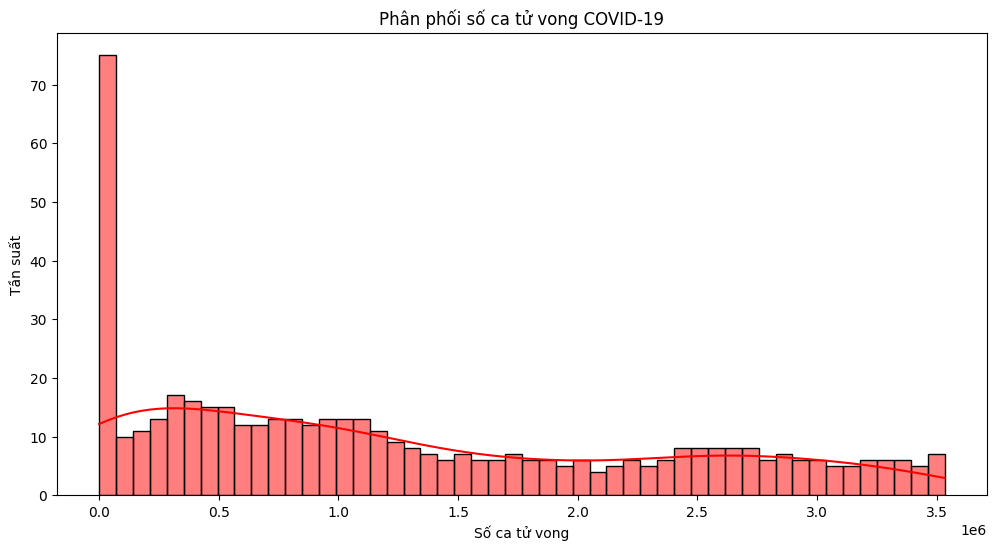

In [29]:
# Vẽ biểu đồ phân phối số ca tử vong
plt.figure(figsize=(12, 6))
sns.histplot(df_daily["Deaths"], bins=50, kde=True, color="red")
plt.xlabel("Số ca tử vong")
plt.ylabel("Tần suất")
plt.title("Phân phối số ca tử vong COVID-19")
plt.show()

In [30]:
# Xác định outliers trong số ca tử vong bằng phương pháp IQR
Q1 = df_daily["Deaths"].quantile(0.25)
Q3 = df_daily["Deaths"].quantile(0.75)
IQR = Q3 - Q1
outliers = df_daily[(df_daily["Deaths"] < (Q1 - 1.5 * IQR)) | (df_daily["Deaths"] > (Q3 + 1.5 * IQR))]

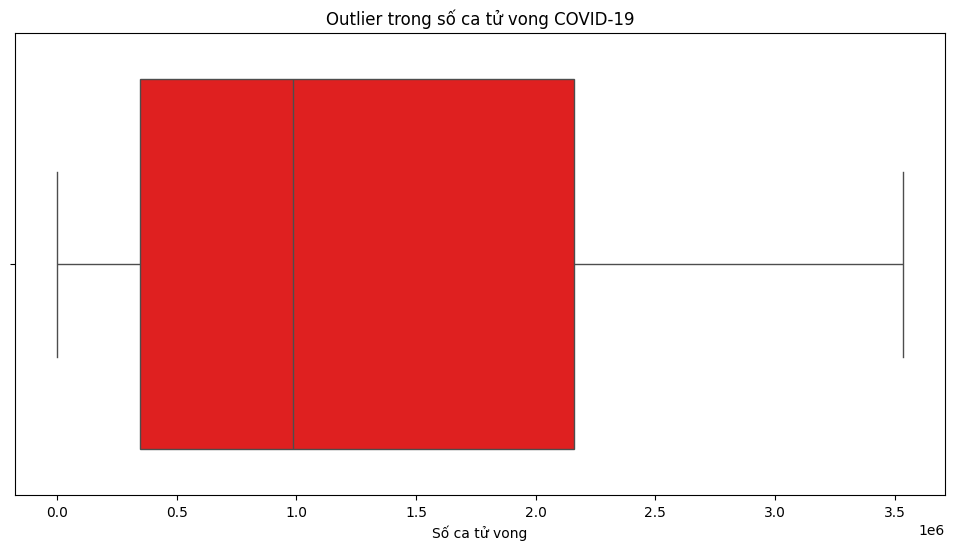

In [31]:
# Vẽ biểu đồ boxplot để xác định outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_daily["Deaths"], color="red")
plt.xlabel("Số ca tử vong")
plt.title("Outlier trong số ca tử vong COVID-19")
plt.show()

In [32]:
# Xử lý dữ liệu số ca phục hồi
df_daily["Recovered"] = pd.to_numeric(df_daily["Recovered"], errors="coerce")
df_daily_cleaned = df_daily.dropna(subset=["Recovered"])

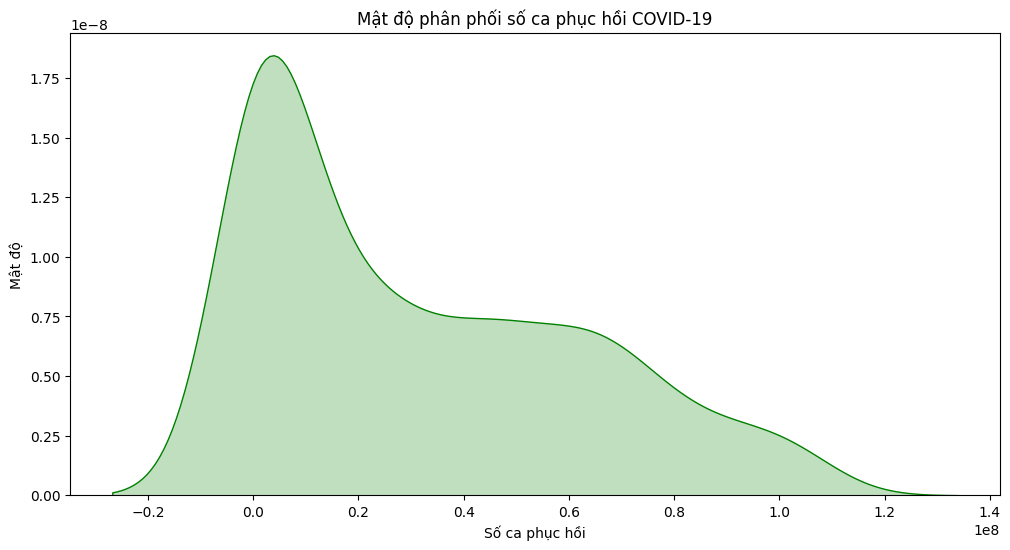

In [33]:
# Vẽ biểu đồ mật độ phân phối số ca phục hồi
plt.figure(figsize=(12, 6))
sns.kdeplot(df_daily_cleaned["Recovered"], fill=True, color="green")
plt.xlabel("Số ca phục hồi")
plt.ylabel("Mật độ")
plt.title("Mật độ phân phối số ca phục hồi COVID-19")
plt.show()


Y2


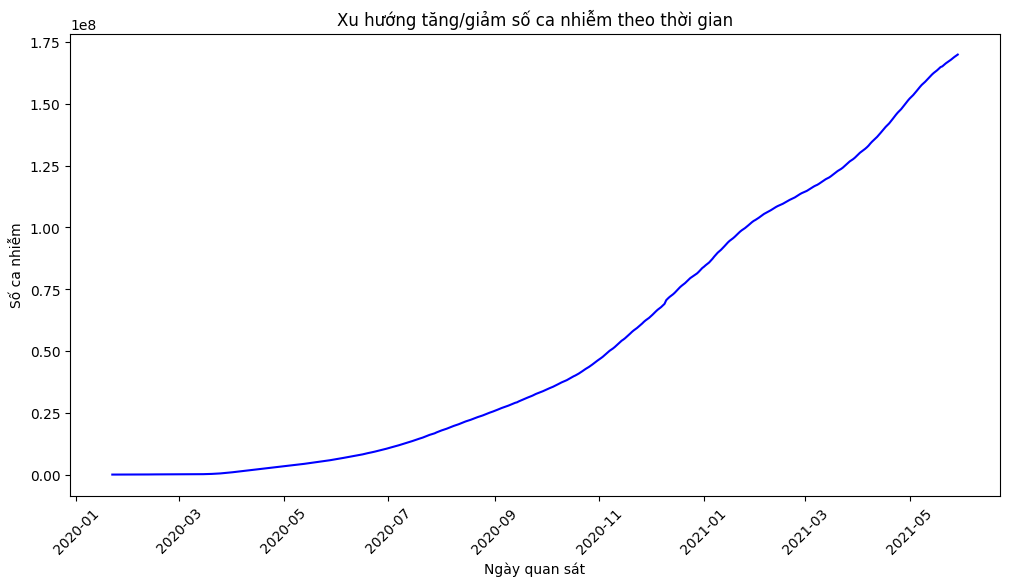

In [34]:
# Hiển thị xu hướng tăng/giảm của số ca nhiễm theo ngày/tháng
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_daily["ObservationDate"], y=df_daily["Confirmed"], color="blue")
plt.xlabel("Ngày quan sát")
plt.ylabel("Số ca nhiễm")
plt.title("Xu hướng tăng/giảm số ca nhiễm theo thời gian")
plt.xticks(rotation=45)
plt.show()


Y3

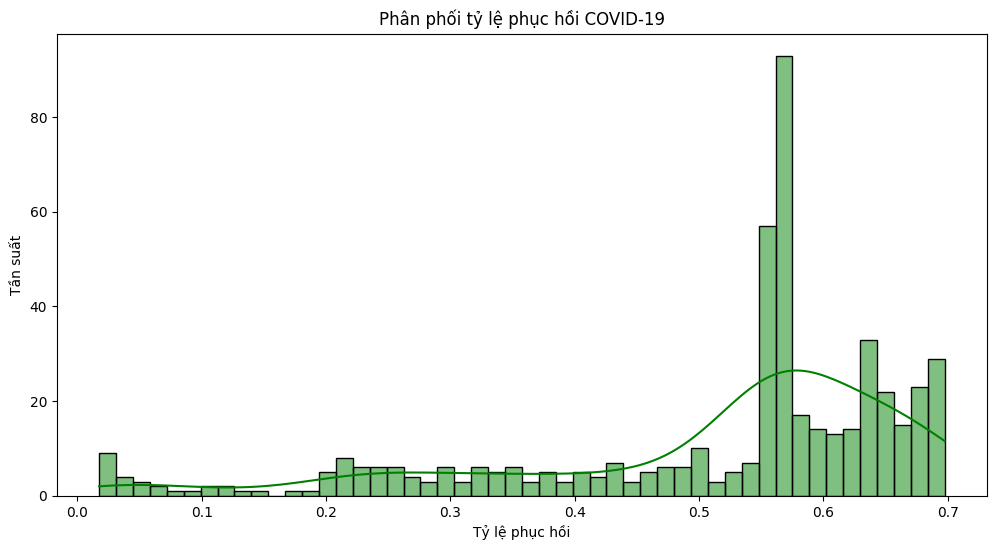

In [35]:
# Phân tích phân phối của tỷ lệ ca phục hồi so với tổng số ca nhiễm
df_daily["Recovery Rate"] = df_daily["Recovered"] / df_daily["Confirmed"]
plt.figure(figsize=(12, 6))
sns.histplot(df_daily["Recovery Rate"], bins=50, kde=True, color="green")
plt.xlabel("Tỷ lệ phục hồi")
plt.ylabel("Tần suất")
plt.title("Phân phối tỷ lệ phục hồi COVID-19")
plt.show()


In [36]:
# Phân tích phân phối số ca tử vong theo nhóm tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Age Group"], y=df["Deaths"], palette="Reds")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số ca tử vong")
plt.title("Phân phối số ca tử vong theo nhóm tuổi")
plt.show()

KeyError: 'Age Group'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Hiển thị mật độ phân phối số ca nhiễm trên bản đồ thế giới
df_map = df.groupby(["Country/Region"])["Confirmed"].sum().reset_index()
fig = px.choropleth(df_map, locations="Country/Region", locationmode="country names", color="Confirmed",
                     title="Mật độ phân phối số ca nhiễm COVID-19", color_continuous_scale="Reds")
fig.show()

NameError: name 'px' is not defined

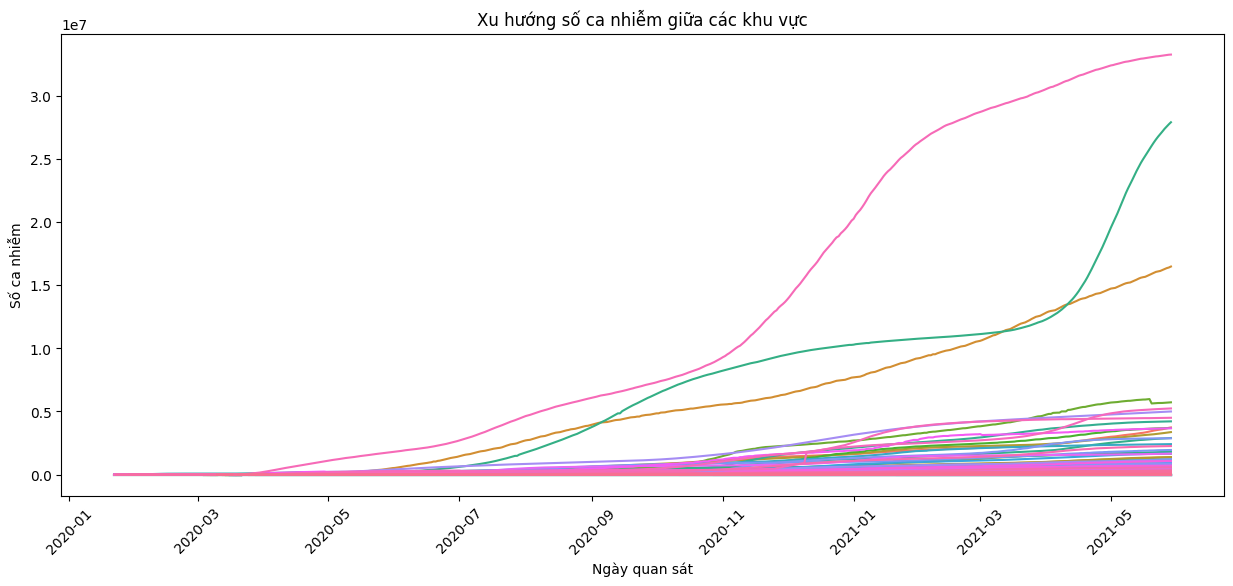

In [ ]:
# Trực quan hóa xu hướng số ca nhiễm giữa các khu vực
df_region = df.groupby(["Country/Region", "ObservationDate"])["Confirmed"].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_region["ObservationDate"], y=df_region["Confirmed"], hue=df_region["Country/Region"], legend=False)
plt.xlabel("Ngày quan sát")
plt.ylabel("Số ca nhiễm")
plt.title("Xu hướng số ca nhiễm giữa các khu vực")
plt.xticks(rotation=45)
plt.show()
